In [12]:
pip install git+https://github.com/dbouget/raidionics_rads_lib.git

  Cloning https://github.com/dbouget/raidionics_rads_lib.git to /home/dbouget/.tmp/pip-req-build-ys73nymz
  Running command git clone --filter=blob:none --quiet https://github.com/dbouget/raidionics_rads_lib.git /home/dbouget/.tmp/pip-req-build-ys73nymz
  Resolved https://github.com/dbouget/raidionics_rads_lib.git to commit 6e0c6a4cc2c08a55fd48ff9189cd91c05f9a98fd
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/dbouget/raidionics_seg_lib.git (to revision master) to /home/dbouget/.tmp/pip-install-1bg38s6_/raidionicsseg_4abdd54e852b4d7fae1dc1d85ac7c88c
  Running command git clone --filter=blob:none --quiet https://github.com/dbouget/raidionics_seg_lib.git /home/dbouget/.tmp/pip-install-1bg38s6_/raidionicsseg_4abdd54e852b4d7fae1dc1d85ac7c88c
  Resolved https://github.com/dbouget/raidionics_seg_lib.git to commit 49a3274f2aa2b07fa81369e8bdaf3747c003f4ae
  Preparing metadata (setup.py) ... done
Note: you may n

In [16]:
#Download the test data
import os
import requests
import zipfile

test_patient_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Samples-RaidionicsRADSLib-UnitTest2.zip'
brain_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_Brain-ONNX-v12.zip'
gbm_preop_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_GBM-ONNX-v12.zip'
gbm_postop_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_GBM_Postop_FV_5p-ONNX_v12.zip'

test_dir = os.path.join(os.getcwd(), 'unit_tests_results_dir')
os.makedirs(test_dir, exist_ok=True)
patient_dir = os.path.join(test_dir, 'patients')
models_dir = os.path.join(test_dir, 'models')
results_dir = os.path.join(test_dir, 'results')
os.makedirs(patient_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

archive_dl_dest = os.path.join(test_dir, 'inference_patient.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(test_patient_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(patient_dir)
           
archive_dl_dest = os.path.join(test_dir, 'brain-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(brain_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)
    
archive_dl_dest = os.path.join(test_dir, 'gbm_preop-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(gbm_preop_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)

archive_dl_dest = os.path.join(test_dir, 'gbm_postop-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(gbm_postop_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)

assert(os.path.exists(os.path.join(models_dir, 'MRI_Brain')))
assert(os.path.exists(os.path.join(models_dir, 'MRI_GBM')))
assert(os.path.exists(os.path.join(models_dir, 'MRI_GBM_Postop_FV_5p')))
assert(os.path.exists(os.path.join(patient_dir, 'patient-UnitTest2')))

In [17]:
# Prepare the configuration file
import configparser
import json
import logging

logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

# For inputs already preprocessed with skull-stripping, the following boolean must be set to True
using_skull_stripped_inputs = True

# For inputs already preprocessed with co-registration (assuming the T1-CE postop MR scan as reference), the following boolean must be set to True
using_co_registered_inputs = False

rads_config = configparser.ConfigParser()
rads_config.add_section('Default')
rads_config.set('Default', 'task', 'neuro_diagnosis')
rads_config.set('Default', 'caller', '')
rads_config.add_section('System')
rads_config.set('System', 'gpu_id', "-1")
rads_config.set('System', 'input_folder', os.path.join(patient_dir, 'patient-UnitTest2'))
rads_config.set('System', 'output_folder', results_dir)
rads_config.set('System', 'model_folder', models_dir)
rads_config.set('System', 'pipeline_filename', os.path.join(test_dir, 'test_pipeline.json'))
rads_config.add_section('Runtime')
rads_config.set('Runtime', 'reconstruction_method', 'probabilities')
rads_config.set('Runtime', 'reconstruction_order', 'resample_first')
rads_config.set('Runtime', 'use_stripped_data', 'True' if using_skull_stripped_inputs else 'False')
rads_config.set('Runtime', 'use_registered_data', 'True' if using_co_registered_inputs else 'False')
rads_config_filename = os.path.join(results_dir, 'rads_config.ini')
with open(rads_config_filename, 'w') as outfile:
    rads_config.write(outfile)

# Prepare the underlying pipeline
pipeline_json = {}
step_index = 1
step_str = str(step_index)
if not using_skull_stripped_inputs:
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Segmentation"
    pipeline_json[step_str]["inputs"] = {}
    pipeline_json[step_str]["inputs"]["0"] = {}
    pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 0
    pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["inputs"]["0"]["labels"] = None
    pipeline_json[step_str]["inputs"]["0"]["space"] = {}
    pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 0
    pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["target"] = "Brain"
    pipeline_json[step_str]["model"] = "MRI_Brain"
    pipeline_json[step_str]["format"] = "thresholding"
    pipeline_json[step_str]["description"] = "Brain segmentation in T1-CE (T0)."
    step_index = step_index + 1
    
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Segmentation"
pipeline_json[step_str]["inputs"] = {}
pipeline_json[step_str]["inputs"]["0"] = {}
pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["0"]["labels"] = None
pipeline_json[step_str]["inputs"]["0"]["space"] = {}
pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["target"] = "Tumor"
pipeline_json[step_str]["model"] = "MRI_GBM"
pipeline_json[step_str]["format"] = "thresholding"
pipeline_json[step_str]["description"] = "Tumor segmentation in T1-CE (T0)."

if not using_skull_stripped_inputs:
    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Segmentation"
    pipeline_json[step_str]["inputs"] = {}
    pipeline_json[step_str]["inputs"]["0"] = {}
    pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
    pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["inputs"]["0"]["labels"] = None
    pipeline_json[step_str]["inputs"]["0"]["space"] = {}
    pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
    pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["target"] = "Brain"
    pipeline_json[step_str]["model"] = "MRI_Brain"
    pipeline_json[step_str]["format"] = "thresholding"
    pipeline_json[step_str]["description"] = "Brain segmentation in T1-CE (T1)."

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Registration"
pipeline_json[step_str]["moving"] = {}
pipeline_json[step_str]["moving"]["timestamp"] = 0
pipeline_json[step_str]["moving"]["sequence"] = "T1-CE"
pipeline_json[step_str]["fixed"] = {}
pipeline_json[step_str]["fixed"]["timestamp"] = 1
pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
pipeline_json[step_str]["description"] = "Registration from T1-CE (T0) to T1-CE (T1)"

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Apply registration"
pipeline_json[step_str]["moving"] = {}
pipeline_json[step_str]["moving"]["timestamp"] = 0
pipeline_json[step_str]["moving"]["sequence"] = "T1-CE"
pipeline_json[step_str]["fixed"] = {}
pipeline_json[step_str]["fixed"]["timestamp"] = 1
pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
pipeline_json[step_str]["direction"] = "forward"
pipeline_json[step_str]["description"] = "Apply registration from T1-CE (T0) to T1-CE (T1)"

additional_postop_sequences = ['T1-w', 'FLAIR']
for seq in additional_postop_sequences:
    if not using_skull_stripped_inputs:
        step_index = step_index + 1
        step_str = str(step_index)
        pipeline_json[step_str] = {}
        pipeline_json[step_str]["task"] = "Segmentation"
        pipeline_json[step_str]["inputs"] = {}
        pipeline_json[step_str]["inputs"]["0"] = {}
        pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
        pipeline_json[step_str]["inputs"]["0"]["sequence"] = seq
        pipeline_json[step_str]["inputs"]["0"]["labels"] = None
        pipeline_json[step_str]["inputs"]["0"]["space"] = {}
        pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
        pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = seq
        pipeline_json[step_str]["target"] = "Brain"
        pipeline_json[step_str]["model"] = "MRI_Brain"
        pipeline_json[step_str]["format"] = "thresholding"
        pipeline_json[step_str]["description"] = "Brain segmentation in {} (T1).".format(seq)

    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Registration"
    pipeline_json[step_str]["moving"] = {}
    pipeline_json[step_str]["moving"]["timestamp"] = 1
    pipeline_json[step_str]["moving"]["sequence"] = seq
    pipeline_json[step_str]["fixed"] = {}
    pipeline_json[step_str]["fixed"]["timestamp"] = 1
    pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["description"] = "Registration from {} (T1) to T1-CE (T1)".format(seq)
    
    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Apply registration"
    pipeline_json[step_str]["moving"] = {}
    pipeline_json[step_str]["moving"]["timestamp"] = 1
    pipeline_json[step_str]["moving"]["sequence"] = seq
    pipeline_json[step_str]["fixed"] = {}
    pipeline_json[step_str]["fixed"]["timestamp"] = 1
    pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["direction"] = "forward"
    pipeline_json[step_str]["description"] = "Apply registration from {} (T1) to T1-CE (T1)".format(seq)

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Segmentation"
pipeline_json[step_str]["inputs"] = {}
pipeline_json[step_str]["inputs"]["0"] = {}
pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["0"]["labels"] = None
pipeline_json[step_str]["inputs"]["0"]["space"] = {}
pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["1"] = {}
pipeline_json[step_str]["inputs"]["1"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["1"]["sequence"] = "T1-w"
pipeline_json[step_str]["inputs"]["1"]["labels"] = None
pipeline_json[step_str]["inputs"]["1"]["space"] = {}
pipeline_json[step_str]["inputs"]["1"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["1"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["2"] = {}
pipeline_json[step_str]["inputs"]["2"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["2"]["sequence"] = "FLAIR"
pipeline_json[step_str]["inputs"]["2"]["labels"] = None
pipeline_json[step_str]["inputs"]["2"]["space"] = {}
pipeline_json[step_str]["inputs"]["2"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["2"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["3"] = {}
pipeline_json[step_str]["inputs"]["3"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["3"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["3"]["labels"] = None
pipeline_json[step_str]["inputs"]["3"]["space"] = {}
pipeline_json[step_str]["inputs"]["3"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["3"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["4"] = {}
pipeline_json[step_str]["inputs"]["4"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["4"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["4"]["labels"] = "Tumor"
pipeline_json[step_str]["inputs"]["4"]["space"] = {}
pipeline_json[step_str]["inputs"]["4"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["4"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["target"] = "Tumor"
pipeline_json[step_str]["model"] = "MRI_GBM_Postop_FV_5p"
pipeline_json[step_str]["description"] = "Tumor segmentation in multiple sequences (T1)."

with open(os.path.join(test_dir, 'test_pipeline.json'), 'w', newline='\n') as outfile:
    json.dump(pipeline_json, outfile, indent=4)

# Run the segmentation task
from raidionicsrads.compute import run_rads
run_rads(rads_config_filename)

INFO:root:Starting pipeline for file: /home/dbouget/Code/Private/raidionics_rads_lib/notebooks/unit_tests_results_dir/test_pipeline.json.
INFO:root:LOG: Pipeline - 8 steps.
INFO:root:LOG: Pipeline - Tumor segmentation in T1-CE (T0). - Begin (1/8)
INFO:root:Starting inference for folder: inputs, with model: /home/dbouget/Code/Private/raidionics_rads_lib/notebooks/unit_tests_results_dir/models/MRI_GBM.
INFO:root:LOG: Segmentation - 4 steps.
INFO:root:LOG: Segmentation - Preprocessing - Begin (1/4)
DEBUG:root:Preprocessing - Extracting input data.
DEBUG:root:Preprocessing - Resampling.
DEBUG:root:Preprocessing - Background clipping.
DEBUG:root:Preprocessing - Intensity normalization.
INFO:root:LOG: Segmentation - Runtime: 1.178373098373413 seconds.
INFO:root:LOG: Segmentation - Preprocessing - End (1/4)
INFO:root:LOG: Segmentation - Inference - Begin (2/4)
DEBUG:root:Loading tensorflow model.
DEBUG:root:Predicting...
DEBUG:root:Starting inference in patch-wise mode.
INFO:root:LOG: Segment

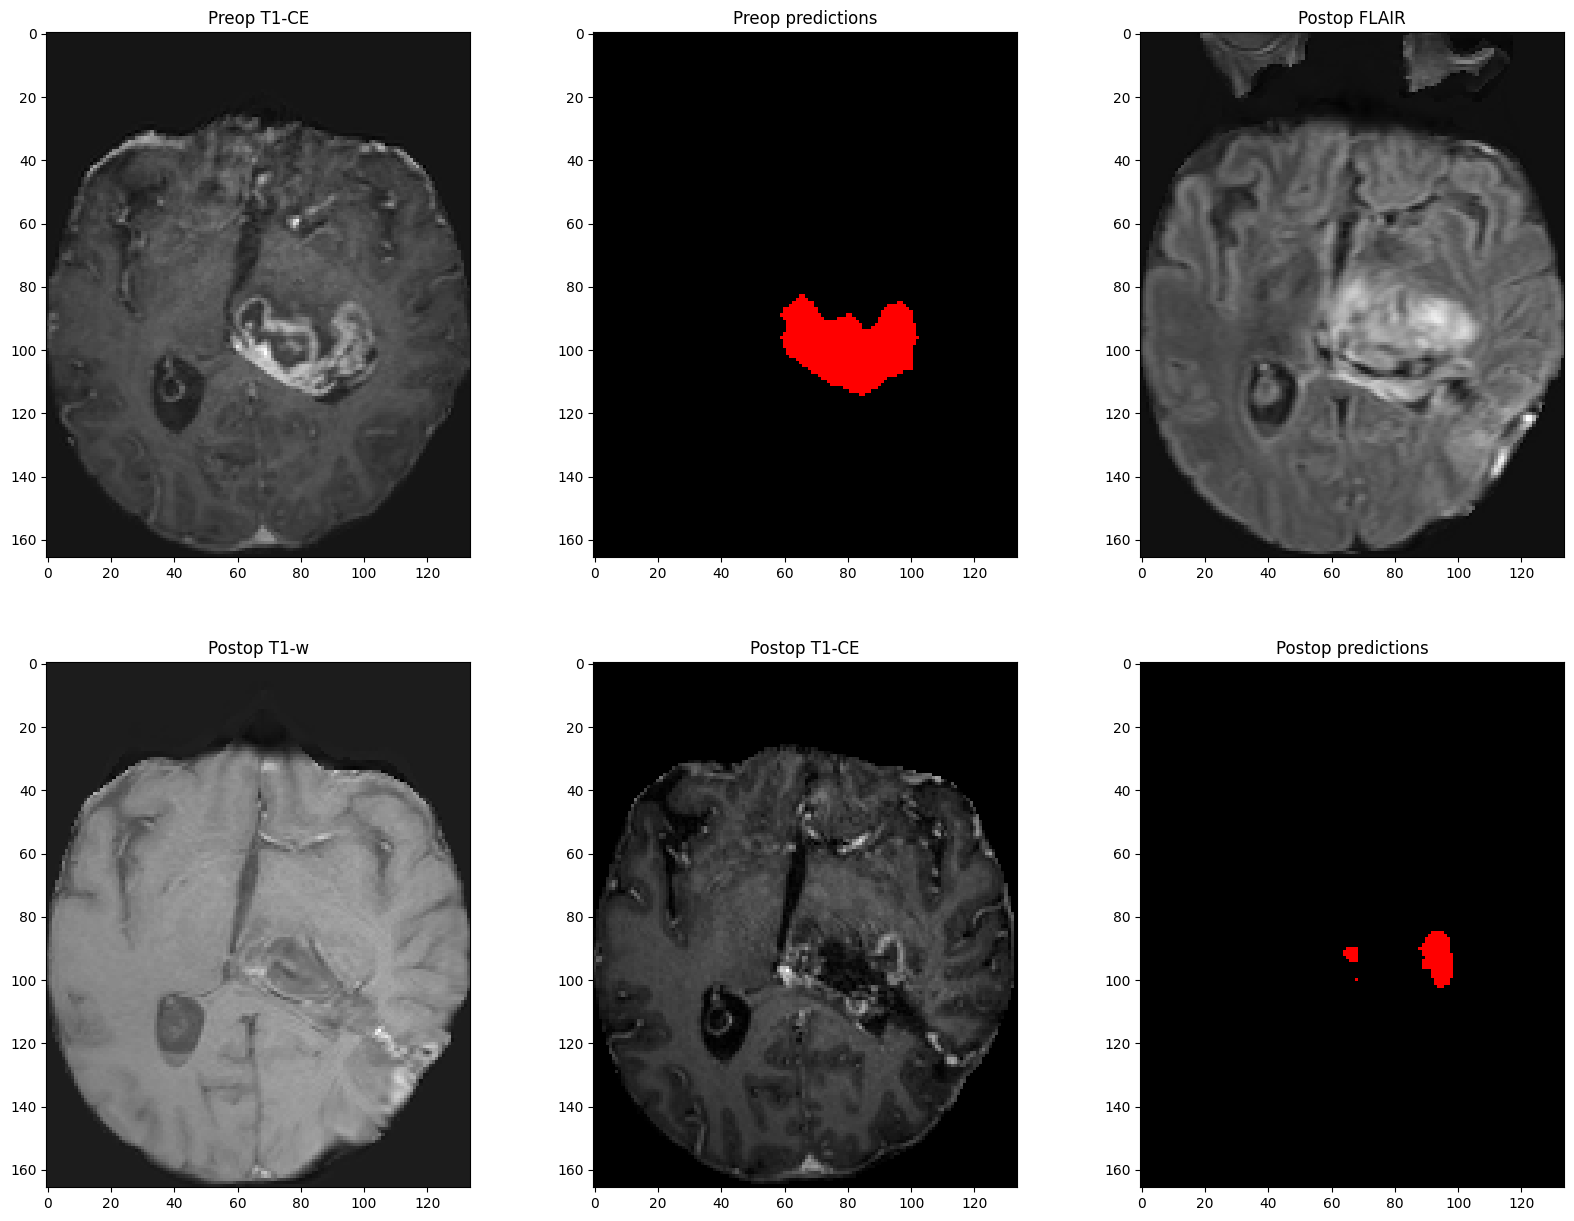

In [42]:
# Inspecting the results
import os
import nibabel as nib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

logging.getLogger().setLevel(logging.WARNING)

# Collecting the co-registered inputs to view them side-by-side
post_t1_filename = os.path.join(patient_dir, 'patient-UnitTest2', 'T1', 'postop_t1gd.nii.gz')
predictions_filename = os.path.join(results_dir, 'T1', 'postop_t1gd_annotation-Tumor.nii.gz')

preop_registration_folder = []
for _, dirs, _ in os.walk(os.path.join(results_dir, 'T0')):
    for d in dirs:
        preop_registration_folder.append(os.path.join(results_dir, 'T0', d))
    break

preop_registered_t1_filename = []
preop_registered_t1_tumor_filename = []

for _, _, files in os.walk(os.path.join(preop_registration_folder[0])):
    for f in files:
        if 'Tumor' in f:
            preop_registered_t1_tumor_filename.append(os.path.join(preop_registration_folder[0], f))
        elif 'Brain' not in f:
            preop_registered_t1_filename.append(os.path.join(preop_registration_folder[0], f))
    break

postop_registration_folder = []
for _, dirs, _ in os.walk(os.path.join(results_dir, 'T1')):
    for d in dirs:
        postop_registration_folder.append(os.path.join(results_dir, 'T1', d))
    break

postop_registered_t1w_filename = []
postop_registered_flair_filename = []

for _, _, files in os.walk(os.path.join(postop_registration_folder[0])):
    for f in files:
        if 'flair_registered' in f and 'Brain' not in f:
            postop_registered_flair_filename.append(os.path.join(postop_registration_folder[0], f))
        elif 't1_registered' in f and 'Brain' not in f:
            postop_registered_t1w_filename.append(os.path.join(postop_registration_folder[0], f))
    break

# Loading all co-registered inputs and predictions
pre_t1_nib = nib.load(preop_registered_t1_filename[0])
pre_predictions_nib = nib.load(preop_registered_t1_tumor_filename[0])
post_t1_nib = nib.load(post_t1_filename)
post_t1w_nib = nib.load(postop_registered_t1w_filename[0])
post_flair_nib = nib.load(postop_registered_flair_filename[0])
predictions_nib = nib.load(predictions_filename)

pre_t1 = pre_t1_nib.get_fdata()[:]
pre_predictions = pre_predictions_nib.get_fdata()[:]
post_t1 = post_t1_nib.get_fdata()[:]
post_t1w = post_t1w_nib.get_fdata()[:]
post_flair = post_flair_nib.get_fdata()[:]
predictions = predictions_rs.get_fdata()[:]

predictions[predictions < 0.6] = 0
predictions[predictions >= 0.6] = 1

# Plotting corresponding inputs and predictions for a single 2D slice
colors = ['black','green','blue','red']
cmap = matplotlib.colors.ListedColormap(colors)

fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0, 0].imshow(pre_t1[:, 76, :], cmap="gray")
ax[0, 1].imshow(pre_predictions[:, 76, :], cmap=cmap)
ax[0, 2].imshow(post_flair[:, 76, :], cmap="gray")
ax[1, 0].imshow(post_t1w[:, 76, :], cmap="gray")
ax[1, 1].imshow(post_t1[:, 76, :], cmap="gray")
ax[1, 2].imshow(predictions[:, 76, :], cmap=cmap)

for i, title in enumerate(["Preop T1-CE", "Preop predictions", "Postop FLAIR", "Postop T1-w", "Postop T1-CE", "Postop predictions"]):
  ax[int(i/3), i%3].set_title(title)
plt.show()